In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score, auc,roc_curve

In [25]:
import random

In [16]:
from sklearn.preprocessing import LabelEncoder

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
import pylab as pl

In [69]:
train = pd.read_csv("/data/av_wns_sep18/train_LZdllcl.csv")
test = pd.read_csv("/data/av_wns_sep18/test_2umaH9m.csv")

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,NaN
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,NaN
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,NaN
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,NaN
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,NaN


In [70]:
train_test = train.append(test)

In [71]:
train_test['region_encoded']= train_test['region'].apply(lambda x : int(x.split('_')[1]) if '_' in x else '')

In [72]:
lbl = LabelEncoder()
train_test['department_encoded'] = lbl.fit_transform(list(train_test['department'].values))
train_test['department_encoded'].head()

0    7
1    4
2    7
3    7
4    8
Name: department_encoded, dtype: int64

In [73]:
train_test['education_encoded'] = lbl.fit_transform(list(train_test['education'].values))

In [74]:
train_test['recruitment_channel_encoded'] = lbl.fit_transform(list(train_test['recruitment_channel'].values))
train_test['recruitment_channel_encoded'].head()

0    2
1    0
2    2
3    0
4    0
Name: recruitment_channel_encoded, dtype: int64

In [75]:
train_test['gender_encoded'] = train_test['gender'].apply(lambda x : 1 if x == 'm' else 2 if x == 'f' else '')

In [22]:
train_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_encoded,gender_encoded,department_encoded,education_encoded,recruitment_channel_encoded
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,7,2,7,2,2
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,22,1,4,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,19,1,7,0,2
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,23,1,7,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,26,1,8,0,0


In [76]:
features = ['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'region_encoded', 'gender_encoded',
       'department_encoded', 'education_encoded',
       'recruitment_channel_encoded']

In [77]:
train_test.shape

(78298, 19)

In [78]:
train_all = train_test[0 : len(train.index)]
test_all = train_test[len(train.index) : len(train_test.index)]

In [79]:
train.shape

(54808, 14)

In [80]:
train_all.shape

(54808, 19)

In [81]:
train_ids = random.sample(list(train_all.index),int(.8*len(train_all.index)))
train_use = train_all[train_all.index.isin(train_ids)]
valid_use = train_all[~train_all.index.isin(train_ids)]

In [82]:
dtrain = xgb.DMatrix(train_use[features], train_use['is_promoted'], missing=np.nan)
dvalid = xgb.DMatrix(valid_use[features],missing=np.nan)
dtest = xgb.DMatrix(test_all[features],missing=np.nan)



In [83]:
test_all.shape

(23490, 19)

In [84]:
test.shape

(23490, 14)

In [85]:
train_use[features].shape

(43846, 12)

In [86]:
params = {"objective": "binary:logistic","booster": "gbtree", "nthread": 4, "silent": 1,"eta": 0.09, "max_depth": 10, "subsample": 0.9, "colsample_bytree": 0.7,"min_child_weight": 1, "seed": 2016, "tree_method": "exact","gamma":0.2,'reg_alpha':1e-5,"n_estimators":5000}


nrounds = 260
watchlist = [(dtrain, 'train')]
bst = xgb.train(params, dtrain, num_boost_round=nrounds, evals=watchlist, verbose_eval=20)


[0]	train-error:0.060028
[20]	train-error:0.05809
[40]	train-error:0.055741
[60]	train-error:0.052479
[80]	train-error:0.050883
[100]	train-error:0.048351
[120]	train-error:0.045204
[140]	train-error:0.042832
[160]	train-error:0.03957
[180]	train-error:0.036833
[200]	train-error:0.034233
[220]	train-error:0.03177
[240]	train-error:0.02917
[259]	train-error:0.026844


In [87]:
valid_preds = list(bst.predict(dvalid))

In [91]:
roc_auc_score(valid_use['is_promoted'], valid_preds)

0.9021705367841194

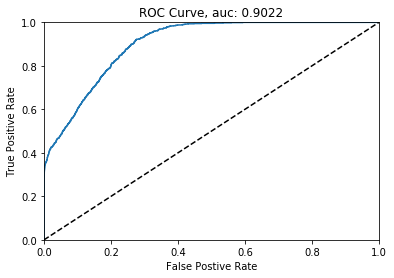

In [92]:
fpr, tpr, thresholds = roc_curve(valid_use['is_promoted'], valid_preds)
auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot([0,1], [0,1], ls = "--", color = "k")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve, auc: %.4f" % auc);

Area under the ROC curve : 0.902171
optimal threshold:0.0716416


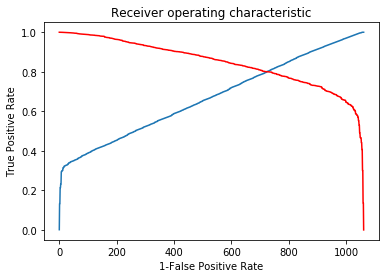

In [111]:
print("Area under the ROC curve : %f" % auc)
####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
thres = roc.iloc[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
print('optimal threshold:'+ str(thres))
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
pl.show()

In [113]:
test_preds = [1 if i > thres else 0 for i in list(bst.predict(dtest))]

In [115]:
pd.DataFrame({'employee_id':test['employee_id'], 'is_promoted' : test_preds}).to_csv('av_wns_xgb_1.csv', index = False)

In [ ]:
#cat_variables = ['department','region','education','gender', 'recruitment_channel']
#pd.dummies()

In [116]:
pd.read_csv('click_cat-16__subcat-11_nc_mail.csv').head()

,ad_id,loc_city,email2,work_exp,pres_salary,age_calculated,single_fa,single_industry,predicted_probability
0,128382538,198201,senapati_t@yahoo.com,18.0,1000000.0,53.021918,41.0,NaN,0.035050
1,128382538,198201,senapati_t@yahoo.com,18.0,1000000.0,53.021918,41.0,41.0,0.035050
2,128382538,198201,senapati_t@yahoo.com,18.0,1000000.0,53.021918,41.0,30.0,0.035050
3,111330934,198235,monika.singh.rathore@gmail.com,1.0,96000000.0,30.556164,35.0,NaN,0.033875
4,117550300,198160,vinayasri77@gmail.com,2.0,80000000.0,29.871233,35.0,-1.0,0.033875
